In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn import metrics
from sklearn.metrics import r2_score as r2

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
#from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.metrics import make_scorer
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

In [6]:
def all_models(X_train,X_val,y_train,y_val):
    results={}
    def test_model(clf):
        
        model=clf
        model.fit(X_train, y_train)
        y_val_pred=model.predict(X_val)
        y_val_pred = np.around(y_val_pred)
        
        
        rmse=np.sqrt(mse(y_val_pred,y_val))
        score=[np.exp(-1*rmse)]
        return score

    clf = linear_model.LinearRegression()
    results["Linear"]=test_model(clf)
    
    clf = linear_model.Ridge()
    results["Ridge"]=test_model(clf)
    
    clf = linear_model.BayesianRidge()
    results["Bayesian Ridge"]=test_model(clf)
    
    clf = linear_model.HuberRegressor()
    results["Hubber"]=test_model(clf)
    
    clf = linear_model.Lasso(alpha=1e-4)
    results["Lasso"]=test_model(clf)
    
    clf = BaggingRegressor(n_estimators=200)
    results["Bagging"]=test_model(clf)
    
    clf = RandomForestRegressor()
    results["RandomForest"]=test_model(clf)
    
    clf = AdaBoostRegressor(learning_rate=0.05)
    results["AdaBoost"]=test_model(clf)
    
    clf = svm.SVR()
    results["SVM RBF"]=test_model(clf)
    
    clf = svm.SVR(kernel="linear")
    results["SVM Linear"]=test_model(clf)

    clf = MLPRegressor(hidden_layer_sizes=(10,15, ))
    results['MLP']=test_model(clf)
    
    results = pd.DataFrame.from_dict(results,orient='index')
    results.columns=["Score"] 
    return results

In [2]:
train_A = pd.read_csv('train_A.csv')
train_B = pd.read_csv('train_B.csv')
train_C = pd.read_csv('train_C.csv')


In [11]:
test = pd.read_csv('test_conv.csv')

In [644]:
test

,Date,Temperature,EventTarget,day
0,11/1/2016,28,0,1
1,11/2/2016,29,0,2
2,11/3/2016,29,0,3
3,11/4/2016,32,0,4
4,11/5/2016,31,0,5
5,11/6/2016,34,0,6
6,11/7/2016,34,0,0
7,11/8/2016,27,0,1
8,11/9/2016,29,0,2
9,11/10/2016,31,2,3


In [645]:
train_A = train_A.drop(columns=['Unnamed: 0'])
train_B = train_B.drop(columns=['Unnamed: 0'])
train_C = train_C.drop(columns=['Unnamed: 0'])

In [646]:
train_A

,Date,Procedure,n_Procedure,Temperature,EventTarget,day
0,12/11/2015,A,1,27,1,4
1,12/12/2015,A,3,21,0,5
2,12/13/2015,A,5,20,1,6
3,12/14/2015,A,8,27,0,0
4,12/15/2015,A,10,22,0,1
...,...,...,...,...,...,...
321,10/27/2016,A,5,37,1,3
322,10/28/2016,A,4,29,1,4
323,10/29/2016,A,7,34,1,5
324,10/30/2016,A,4,32,0,6


In [647]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

valuesA = train_A.day.values
valuest = test.day.values


label_encoder = LabelEncoder()
integer_encodedA = label_encoder.fit_transform(valuesA)
integer_encodedt = label_encoder.fit_transform(valuest)


onehot_encoder = OneHotEncoder(sparse=False)
integer_encodedA = integer_encodedA.reshape(len(integer_encodedA), 1)
integer_encodedt = integer_encodedt.reshape(len(integer_encodedt), 1)

onehot_encoded_dayA = onehot_encoder.fit_transform(integer_encodedA)
onehot_encoded_dayt = onehot_encoder.fit_transform(integer_encodedt)
print(onehot_encoded_dayA)
print(onehot_encoded_dayt)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0.

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour

In [648]:
days = pd.DataFrame(data=onehot_encoded_dayA)

In [649]:
dayst = pd.DataFrame(data=onehot_encoded_dayt)

In [650]:
train_A1 = pd.concat([train_A,days],axis=1)
train_A1 = train_A1.drop(columns=['day'])
train_B1 = pd.concat([train_B,days],axis=1)
train_B1 = train_B1.drop(columns=['day'])
train_C1 = pd.concat([train_C,days],axis=1)
train_C1 = train_C1.drop(columns=['day'])

In [651]:
test1 = pd.concat([test,dayst],axis=1)

In [652]:
test1 = test1.drop(columns=['day'])

In [653]:
train_A1

,Date,Procedure,n_Procedure,Temperature,EventTarget,0,1,2,3,4,5,6
0,12/11/2015,A,1,27,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,12/12/2015,A,3,21,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,12/13/2015,A,5,20,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12/14/2015,A,8,27,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12/15/2015,A,10,22,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
321,10/27/2016,A,5,37,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
322,10/28/2016,A,4,29,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
323,10/29/2016,A,7,34,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
324,10/30/2016,A,4,32,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [654]:
X_test = test1.iloc[:,1:]

In [655]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test = sc.fit_transform(X_test)

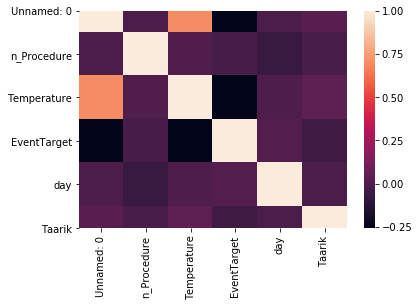

In [512]:
c=train.corr()
sns.heatmap(c)
plt.show()

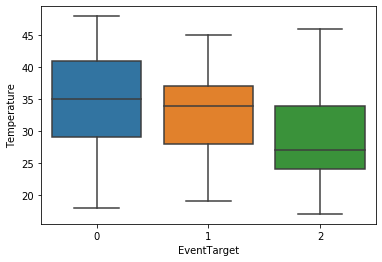

In [513]:
sns.boxplot(x=train.EventTarget,y=train.Temperature)
plt.show()

In [6]:
type(train.Date[0])

str

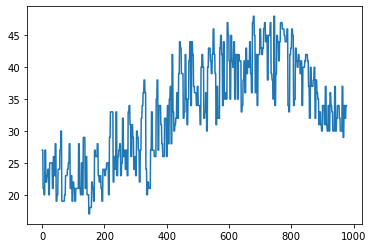

In [12]:
plt.plot(train.Temperature)
plt.show()

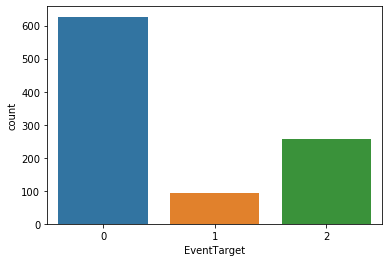

In [18]:
sns.countplot(train.EventTarget)
plt.show()

 skewed distribution  idea-subsampling

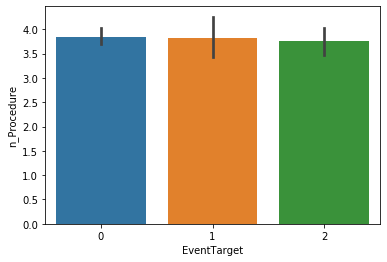

In [45]:
sns.barplot(x=train.EventTarget,y=train.n_Procedure)
plt.show()

on an average same no. of pateints for all 3 events

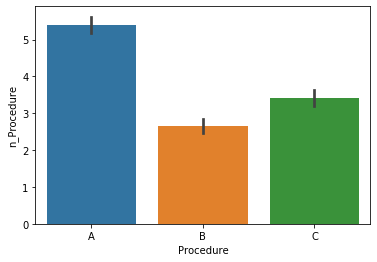

In [43]:
sns.barplot(x=train.Procedure,y=train.n_Procedure)
plt.show()

A is common procedure on any day

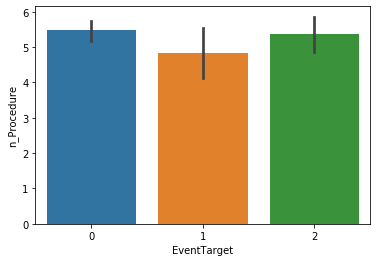

In [34]:
sns.barplot(x=trainA.EventTarget,y=trainA.n_Procedure)
plt.show()

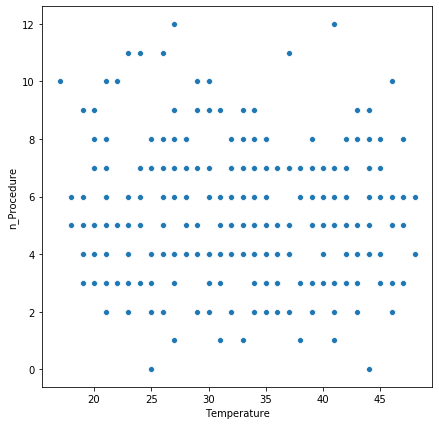

In [47]:
plt.figure(figsize=(7,7))
sns.scatterplot(trainA.Temperature,trainA.n_Procedure)
plt.show()

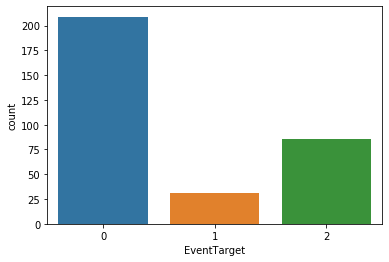

In [48]:
sns.countplot(trainA.EventTarget)
plt.show()

since EventTarget variable is skewed we create batches with same amount of all three types of EventTargets(where type 0 is randomly distributed and event 1 is repeated in every batch but every batch contains roughly same number of all three!)

In [656]:
def lr(t,W,b):
    X = t.iloc[:,3:]
    y = t.iloc[:,2]
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X = sc.fit_transform(X)
    y = np.array(y)
    y = y.reshape(X.shape[0],1)
    m,n = X.shape
    alpha = 0.001
    for i in range(1000):
    
        yhat = np.dot(X,W) + b
        loss = np.sum((yhat - y)**2)/m
        if (i%100==0):
            print(loss)
        dW = np.dot(X.T,(yhat-y))/m
        db = np.sum(yhat - y)/m
        W = W - alpha*dW
        b = b - alpha*db
    return (W,b)

In [691]:
ta0 = train_A1[train_A1.EventTarget==0]
ta1 = train_A1[train_A1.EventTarget==1]
ta2 = train_A1[train_A1.EventTarget==2]

ta1 has smallest size

In [692]:
ta1.shape

(31, 12)

In [693]:
ta0.shape

(209, 12)

In [694]:
ta2.shape

(86, 12)

In [695]:
t0 = ta0.sample(31)
t2 = ta2.sample(31)
ta0 = ta0.drop(t0.index)
ta2 = ta2.drop(t2.index)
t = pd.concat([t0,ta1,t2])
t = t.sample(frac=1)

In [696]:
W = np.zeros((9,1))
b = 0

In [697]:
W,b = lr(t,W,b)

30.451612903225808
25.669784370191827
21.757493142338618
18.55640717989828
15.937083717838103
13.793681849579908
12.039647321886376
10.60418954230798
9.429404464823723
8.467924295266176


In [698]:
t0 = ta0.sample(31)
t2 = ta2.sample(31)
ta0 = ta0.drop(t0.index)
ta2 = ta2.drop(t2.index)
t = pd.concat([t0,ta1,t2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

11.214255578329002
10.135270727766203
9.25426922031464
8.534820174779705
7.947218947844788
7.467240247144099
7.075123509109692
6.7547470256391415
6.492955512531649
6.2790124605454265


In [699]:
t0 = ta0.sample(24)
t1 = ta1.sample(24)
ta0 = ta0.drop(t0.index)
ta1 = ta1.drop(t1.index)
t = pd.concat([t0,t1,ta2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

4.921845162829177
4.744754209070166
4.60425417436139
4.492291965262414
4.4026779268755405
4.330636620577844
4.272469615474183
4.225301583671058
4.186888511503459
4.155472355967581


In [700]:
ta1 = train_A1[train_A1.EventTarget==1].sample(24)
t0 = ta0.sample(24)
ta0 = ta0.drop(t0.index)
t = pd.concat([t0,ta1,ta2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

4.260092179224592
4.2261502494123855
4.2001327687642025
4.180163927072056
4.164818357419149
4.153011340381498
4.143916184763613
4.136901953941402
4.131486449822854
4.12730065827409


In [701]:
ta1 = train_A1[train_A1.EventTarget==1].sample(24)
t0 = ta0.sample(24)
ta0 = ta0.drop(t0.index)
t = pd.concat([t0,ta1,ta2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

3.8077171847536064
3.76222099023548
3.727406293242249
3.7007139084862755
3.680206588982017
3.664416265152978
3.6522291208056297
3.6427990701066904
3.635482566209462
3.629789442341661


In [702]:
ta1 = train_A1[train_A1.EventTarget==1].sample(24)
t0 = ta0.sample(24)
ta0 = ta0.drop(t0.index)
t = pd.concat([t0,ta1,ta2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

3.703682751137415
3.5497110534230134
3.4321606516415266
3.342152829496333
3.273032398598671
3.219797297682783
3.178677637171591
3.146824320081949
3.1220781684056456
3.1027983213545767


In [703]:
ta1 = train_A1[train_A1.EventTarget==1].sample(24)
t0 = ta0.sample(24)
ta0 = ta0.drop(t0.index)
t = pd.concat([t0,ta1,ta2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

3.9785561070985063
3.8690112203182547
3.7815658197486917
3.7116202373825464
3.6555548249037226
3.6105169241338055
3.5742550473264805
3.5449895940148477
3.5213118955845633
3.502105261490247


In [704]:
ta1 = train_A1[train_A1.EventTarget==1].sample(24)
t0 = ta0.sample(24)
ta0 = ta0.drop(t0.index)
t = pd.concat([t0,ta1,ta2])
t = t.sample(frac=1)
W,b = lr(t,W,b)

3.602202235189062
3.536236168972101
3.4842883044063115
3.443303149356061
3.4109061539897834
3.3852490144432417
3.3648907020309453
3.3487058523553346
3.3358141304323627
3.3255256957256165


In [710]:
Wb = np.zeros((9,1))
bb = 0

In [711]:
tb0 = train_B1[train_B1.EventTarget==0]
tb1 = train_B1[train_B1.EventTarget==1]
tb2 = train_B1[train_B1.EventTarget==2]

In [712]:
t0 = tb0.sample(31)
t2 = tb2.sample(31)
tb0 = tb0.drop(t0.index)
tb2 = tb2.drop(t2.index)
t = pd.concat([t0,tb1,t2])
t = t.sample(frac=1)

In [713]:
Wb,bb = lr(t,Wb,bb)

10.774193548387096
9.362821934743126
8.20738139558782
7.26139962131428
6.486855143982938
5.8526376802297175
5.33328974580636
4.907977946142267
4.559651872052707
4.274356278889956


In [714]:
tb0.shape

(178, 12)

In [715]:
t0 = tb0.sample(31)
t2 = tb2.sample(31)
tb0 = tb0.drop(t0.index)
tb2 = tb2.drop(t2.index)
t = pd.concat([t0,tb1,t2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

4.296871424736442
4.0668368844809715
3.8803824286931294
3.7291656780561566
3.606461134397857
3.506842113482541
3.4259263587348214
3.360172322703548
3.3067158243982946
3.263238928397389


In [716]:
t0 = tb0.sample(24)
t1 = tb1.sample(24)
tb0 = tb0.drop(t0.index)
tb1 = tb1.drop(t1.index)
t = pd.concat([t0,t1,tb2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

3.027002839646849
2.9292429600172745
2.8515344421663853
2.789670419608964
2.740338911149699
2.7009307990012434
2.6693892524601748
2.6440916128490963
2.6237567098439536
2.6073721072431275


In [717]:
tb1 = train_B1[train_B1.EventTarget==1].sample(24)
t0 = tb0.sample(24)
tb0 = tb0.drop(t0.index)
t = pd.concat([t0,tb1,tb2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

3.4168356371372877
3.300989681289411
3.208213763072654
3.1337505583672156
3.0738575110354716
3.0255832897528054
2.9865949765241173
2.9550441644110523
2.9294629605225904
2.908683024076831


In [718]:
tb1 = train_B1[train_B1.EventTarget==1].sample(24)
t0 = tb0.sample(24)
tb0 = tb0.drop(t0.index)
t = pd.concat([t0,tb1,tb2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

2.7162748955987595
2.671013299099349
2.63517225646003
2.606782166775677
2.5842868707714897
2.5664565188457544
2.552318881095515
2.541105176930525
2.53220734083525
2.525144299173368


In [719]:
tb1 = train_B1[train_B1.EventTarget==1].sample(24)
t0 = tb0.sample(24)
tb0 = tb0.drop(t0.index)
t = pd.concat([t0,tb1,tb2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

2.556179481462525
2.5309372402260264
2.5109072852989764
2.4949956417301404
2.482341007926431
2.4722647163741063
2.4642315592662993
2.4578191000774905
2.452693616931179
2.4485912318567253


In [720]:
tb1 = train_B1[train_B1.EventTarget==1].sample(24)
t0 = tb0.sample(24)
tb0 = tb0.drop(t0.index)
t = pd.concat([t0,tb1,tb2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

2.7068290039908067
2.6689828790609744
2.639630458335778
2.6168213998383854
2.5990604445066388
2.585199989049055
2.574358241448062
2.5658568246221383
2.5591731731081313
2.5539041885104794


In [721]:
tb1 = train_B1[train_B1.EventTarget==1].sample(24)
t0 = tb0.sample(24)
tb0 = tb0.drop(t0.index)
t = pd.concat([t0,tb1,tb2])
t = t.sample(frac=1)
Wb,bb = lr(t,Wb,bb)

2.9716163389028143
2.8767448094704253
2.803759148181621
2.747454074975795
2.703884127884228
2.670055465438535
2.6436936205438
2.6230683828018844
2.606861673519674
2.5940677925687208


In [722]:
tb0.shape

(3, 12)

In [759]:
Wc = np.zeros((9,1))
bc = 0

In [760]:
tc0 = train_C1[train_C1.EventTarget==0]
tc1 = train_C1[train_C1.EventTarget==1]
tc2 = train_C1[train_C1.EventTarget==2]

In [761]:
t0 = tc0.sample(31)
t2 = tc2.sample(31)
tc0 = tc0.drop(t0.index)
tc2 = tc2.drop(t2.index)
t = pd.concat([t0,tc1,t2])
t = t.sample(frac=1)
Wc,bc = lr(t,Wc,bc)

12.35483870967742
10.465206935037584
8.921267510747763
7.659652982624273
6.628637115485343
5.785990909489302
5.097234628145565
4.534212443038603
4.073929956819628
3.6976059697828236


In [762]:
t0 = tc0.sample(31)
t2 = tc2.sample(31)
tc0 = tc0.drop(t0.index)
tc2 = tc2.drop(t2.index)
t = pd.concat([t0,tc1,t2])
t = t.sample(frac=1)
Wc,bc = lr(t,Wc,bc)

6.817482379253586
6.233739857199007
5.757044941113784
5.367706363741342
5.049666167414379
4.789827151639639
4.577505249916838
4.40398353956872
4.262148951612813
4.146196289633074


In [763]:
t0 = tc0.sample(24)
t1 = tc1.sample(24)
tc0 = tc0.drop(t0.index)
tc1 = tc1.drop(t1.index)
t = pd.concat([t0,t1,tc2])
t = t.sample(frac=1)
Wc,bc = lr(t,Wc,bc)

2.667384910456501
2.5723460405472074
2.493907202563382
2.4289752499369066
2.375062388964307
2.3301631216835186
2.2926569971946513
2.261231608048811
2.23482149828852
2.21255960124741


In [764]:
tc1 = train_C1[train_C1.EventTarget==1].sample(24)
t0 = tc0.sample(24)
tc0 = tc0.drop(t0.index)
t = pd.concat([t0,tc1,tc2])
t = t.sample(frac=1)
Wc,bc = lr(t,Wc,bc)

1.9661161806778422
1.9235172445948345
1.8895440996259996
1.862348792062248
1.8404977619545246
1.8228753344133561
1.8086104237576786
1.797020708935059
1.7875699935992249
1.7798355427805523


In [765]:
tc1 = train_C1[train_C1.EventTarget==1].sample(24)
t0 = tc0.sample(24)
tc0 = tc0.drop(t0.index)
t = pd.concat([t0,tc1,tc2])
t = t.sample(frac=1)
Wc,bc = lr(t,Wc,bc)

3.111412891657683
3.085157110040999
3.065163421090432
3.0499043844215334
3.038231191684817
3.0292786662876545
3.0223943261655566
3.0170853672780016
3.0129790036066817
3.009792769817691


In [766]:
tc1 = train_C1[train_C1.EventTarget==1].sample(24)
t0 = tc0.sample(24)
tc0 = tc0.drop(t0.index)
t = pd.concat([t0,tc1,tc2])
t = t.sample(frac=1)
Wc,bc = lr(t,Wc,bc)

3.844774933500803
3.8005761474567867
3.7650309678324145
3.7363891088975945
3.7132633127320958
3.6945523684371184
3.679380817402773
3.6670516421698145
3.6570090792880006
3.6488093421448564


In [767]:
tc0.shape

(51, 12)

In [768]:
t

,Date,Procedure,n_Procedure,Temperature,EventTarget,0,1,2,3,4,5,6
301,10/7/2016,C,2,34,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
141,4/30/2016,C,3,30,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
120,4/9/2016,C,4,26,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,12/19/2015,C,2,25,2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
191,6/19/2016,C,5,45,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
284,9/20/2016,C,4,41,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
104,3/24/2016,C,3,22,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
177,6/5/2016,C,4,40,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0
108,3/28/2016,C,1,36,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [769]:
yhata = np.dot(X_test,W) + b

In [770]:
yhatb = np.dot(X_test,Wb) + bb

In [771]:
yhatc = np.dot(X_test,Wc) + bc

In [772]:
yhata.shape

(41, 1)

In [773]:
yhatb.shape

(41, 1)

In [774]:
yhatc.shape

(41, 1)

In [775]:
pred = []
for i in range(0,41):
    pred.append(yhata[i])
    pred.append(yhatb[i])
    pred.append(yhatc[i])
pred = np.array(pred)

In [776]:
pred = pred.squeeze()

In [777]:
pred=pd.Series(data=pred)

In [778]:
pred.to_csv('p2.csv')

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [779]:
test

,Date,Temperature,EventTarget,day
0,11/1/2016,28,0,1
1,11/2/2016,29,0,2
2,11/3/2016,29,0,3
3,11/4/2016,32,0,4
4,11/5/2016,31,0,5
5,11/6/2016,34,0,6
6,11/7/2016,34,0,0
7,11/8/2016,27,0,1
8,11/9/2016,29,0,2
9,11/10/2016,31,2,3


In [780]:
train_A

,Date,Procedure,n_Procedure,Temperature,EventTarget,day
0,12/11/2015,A,1,27,1,4
1,12/12/2015,A,3,21,0,5
2,12/13/2015,A,5,20,1,6
3,12/14/2015,A,8,27,0,0
4,12/15/2015,A,10,22,0,1
...,...,...,...,...,...,...
321,10/27/2016,A,5,37,1,3
322,10/28/2016,A,4,29,1,4
323,10/29/2016,A,7,34,1,5
324,10/30/2016,A,4,32,0,6


In [45]:
train2 = pd.read_csv('train_conv.csv')

In [46]:
train2 = train2.drop(columns=['Unnamed: 0','day','Taarik'])

In [47]:
train2

,Date,Procedure,n_Procedure,Temperature,EventTarget,Month
0,2015-12-11,A,1,27,1,Dec
1,2015-12-11,B,1,27,1,Dec
2,2015-12-11,C,0,27,1,Dec
3,2015-12-12,A,3,21,0,Dec
4,2015-12-12,B,2,21,0,Dec
...,...,...,...,...,...,...
973,2016-10-30,B,9,32,0,Oct
974,2016-10-30,C,0,32,0,Oct
975,2016-10-31,A,5,34,0,Oct
976,2016-10-31,B,4,34,0,Oct


In [41]:
test.Temperature.mean()

28.951219512195124

In [42]:
train2[(train2.Month=='Dec') | (train2.Month=='Oct')].Temperature.mean()

29.03846153846154

In [43]:
train2.EventTarget.value_counts()

0    627
2    258
1     93
Name: EventTarget, dtype: int64

In [44]:
test.EventTarget.value_counts()

0    29
2     9
1     3
Name: EventTarget, dtype: int64

In [19]:
train2 = train2[(train2.EventTarget==0) | (train2.EventTarget==2)]

In [20]:
m=[]

In [21]:
for i,item in enumerate(train2.Month):
    if ((item=='Dec') | (item=='Oct')):
        m.append(1)
    else:
        m.append(0)

In [22]:
len(m)

885

In [23]:
train2['t'] = m

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
train2

,Date,Procedure,n_Procedure,Temperature,EventTarget,Month
0,2015-12-11,A,1,27,1,Dec
1,2015-12-11,B,1,27,1,Dec
2,2015-12-11,C,0,27,1,Dec
3,2015-12-12,A,3,21,0,Dec
4,2015-12-12,B,2,21,0,Dec
...,...,...,...,...,...,...
973,2016-10-30,B,9,32,0,Oct
974,2016-10-30,C,0,32,0,Oct
975,2016-10-31,A,5,34,0,Oct
976,2016-10-31,B,4,34,0,Oct


In [49]:
train2.t.value_counts()

AttributeError: 'DataFrame' object has no attribute 't'

In [50]:
train2A = train2[train2.Procedure=='A']
train2B = train2[train2.Procedure=='B']
train2C = train2[train2.Procedure=='C']

In [51]:
train2A

,Date,Procedure,n_Procedure,Temperature,EventTarget,Month
0,2015-12-11,A,1,27,1,Dec
3,2015-12-12,A,3,21,0,Dec
6,2015-12-13,A,5,20,1,Dec
9,2015-12-14,A,8,27,0,Dec
12,2015-12-15,A,10,22,0,Dec
...,...,...,...,...,...,...
963,2016-10-27,A,5,37,1,Oct
966,2016-10-28,A,4,29,1,Oct
969,2016-10-29,A,7,34,1,Oct
972,2016-10-30,A,4,32,0,Oct


In [52]:
XA = train2A.iloc[:,[3,4]]

In [53]:
y = train2A.iloc[:,2]

In [54]:
X_test = test.iloc[:,[1,2]]

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XA = sc.fit_transform(XA)
X_test = sc.transform(X_test)

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(XA, y, test_size=0.2, random_state=0)

In [72]:
X_train.shape

(260, 2)

In [73]:
all_models(X_train,X_val,y_train,y_val)

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Score
Linear,0.161098
Ridge,0.161098
Bayesian Ridge,0.159112
Hubber,0.158458
Lasso,0.161098
Bagging,0.141156
RandomForest,0.152142
AdaBoost,0.163123
SVM RBF,0.171632
SVM Linear,0.163123


In [87]:
from sklearn.svm import SVR
br = SVR(kernel='linear')
br.fit(X_train,y_train)
yhat=br.predict(X_val)


In [88]:
from sklearn.metrics import mean_squared_error
e=np.sqrt(mean_squared_error(y_val,yhat))
np.exp(-e)

0.17065328548923173

In [89]:
pd.Series(yhat).to_csv('yhat1.csv')
pd.Series(y_val).to_csv('yval1.csv')

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


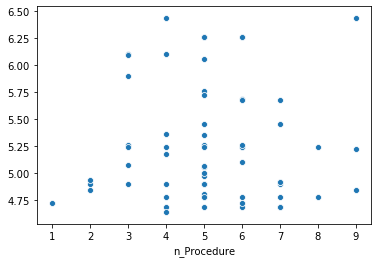

In [83]:
sns.scatterplot(y_val,yhat)
plt.show()

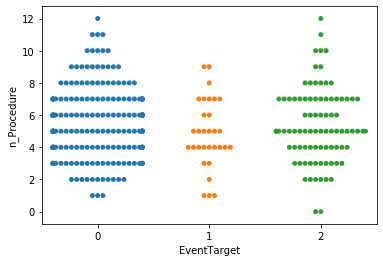

In [85]:
sns.swarmplot(train2A.EventTarget,train2A.n_Procedure)
plt.show()

In [94]:
test.iloc[30:,:].Temperature.mean()

28.272727272727273

In [96]:
train2.iloc[:15,:]

,Date,Procedure,n_Procedure,Temperature,EventTarget,Month
0,2015-12-11,A,1,27,1,Dec
1,2015-12-11,B,1,27,1,Dec
2,2015-12-11,C,0,27,1,Dec
3,2015-12-12,A,3,21,0,Dec
4,2015-12-12,B,2,21,0,Dec
5,2015-12-12,C,3,21,0,Dec
6,2015-12-13,A,5,20,1,Dec
7,2015-12-13,B,2,20,1,Dec
8,2015-12-13,C,3,20,1,Dec
9,2015-12-14,A,8,27,0,Dec


In [103]:
train2B[train2B.Month=='Oct'].n_Procedure.value_counts()

2    7
3    6
0    6
5    5
4    4
1    2
9    1
Name: n_Procedure, dtype: int64

In [243]:
train_B = pd.read_csv('train_B.csv')

In [220]:
train_A.Temperature.value_counts()

34    24
42    18
32    15
41    14
26    14
21    13
27    13
33    13
36    12
35    12
23    12
30    12
24    11
31    11
44    11
40    10
45    10
20    10
37    10
39    10
43     9
25     8
19     8
28     8
22     7
46     7
38     7
47     6
29     6
18     2
48     2
17     1
Name: Temperature, dtype: int64

# After reaching the conclusion that any kind of model is unable to learn on the given dataset,we considered our best prediction from the model though random and searched through out the train and test datasets and across all three kinds of procedures(A,B,C) for similar sample features(what the model is supposed to do),looked for outliers and hence predicted the n_Procedure values for the test dataset in accordance with the respective n_Procedure values in the training dataset.

In [250]:
train_A.Temperature.value_counts()

34    24
42    18
32    15
41    14
26    14
21    13
27    13
33    13
36    12
35    12
23    12
30    12
24    11
31    11
44    11
40    10
45    10
20    10
37    10
39    10
43     9
25     8
19     8
28     8
22     7
46     7
38     7
47     6
29     6
18     2
48     2
17     1
Name: Temperature, dtype: int64

In [248]:
train_A[train_A.Temperature==34][train_A[train_A.Temperature==34].EventTarget==0]

,Unnamed: 0,Date,Procedure,n_Procedure,Temperature,EventTarget,day
107,321,3/27/2016,A,5,34,0,6
126,378,4/15/2016,A,6,34,0,4
134,402,4/23/2016,A,5,34,0,5
159,477,5/18/2016,A,9,34,0,2
168,504,5/27/2016,A,8,34,0,4
193,579,6/21/2016,A,2,34,0,1
214,642,7/12/2016,A,3,34,0,1
230,690,7/28/2016,A,5,34,0,3
249,747,8/16/2016,A,6,34,0,1
263,789,8/30/2016,A,7,34,0,1


In [249]:
test[test.Temperature==34][test[test.Temperature==34].EventTarget==0]

,Date,Temperature,EventTarget,day
5,11/6/2016,34,0,6
6,11/7/2016,34,0,0


here we see the feature set {34,0,6} appearing twice in the training set with same n_Procedures(=5) and also in the test set.
Hence 5 becomes a likely prediction for the n_Procedure value for the respective test sample.

In [872]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = train2A.t
X = train2A.drop(columns=['Date','Procedure','Month','t'])

# setting up testing and training sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X, y)

ImportError: cannot import name '_check_sample_weight' from 'sklearn.utils.validation' (C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\sklearn\utils\validation.py)

In [214]:
p=pd.read_csv('p3.csv',header=None)

In [215]:
p=p[0]

In [216]:
for i in range(len(p)):
    if(i%3==0):
        p[i] += 0.5

In [217]:
p

0      6.500000
1      2.483548
2      3.145217
3      6.071704
4      2.000000
         ...   
118    2.647963
119    2.000000
120    5.894615
121    2.578702
122    3.068660
Name: 0, Length: 123, dtype: float64

In [218]:
p.to_csv('p13.csv')

C:\Users\shrey\AppData\Local\Continuum\anaconda3\envs\PythonGPU\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
